In [1]:
# data organization libraries
import numpy as np
import pandas as pd

# data visualization libraries
import plotly.express as px
import matplotlib.pyplot as plt

# modeling libraries
import sklearn as sk


In [2]:
# get raw data

fire_df = pd.read_csv('clean_fires.csv')

fire_df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
len(fire_df)

512

In [4]:
mons = fire_df['month'].value_counts()

In [5]:
mons.index



Int64Index([8, 9, 3, 7, 2, 6, 10, 12, 4], dtype='int64')

In [6]:
aug_fires = fire_df[fire_df['month'] == 8]

aug_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
5,8,6,8,0,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
12,6,5,8,5,63.5,70.8,665.3,0.8,17.0,72,6.7,0.0,0.0
23,7,4,8,6,90.2,110.9,537.4,6.2,19.5,43,5.8,0.0,0.0


In [7]:
len(aug_fires)

184

In [8]:
samp = aug_fires.sample(n=60)

samp.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
485,4,4,8,3,95.1,141.3,605.8,17.7,20.6,58,1.3,0.0,0.00
446,7,4,8,0,91.6,181.3,613.0,7.6,19.3,61,4.9,0.0,0.00
411,5,4,8,0,93.6,235.1,723.1,10.1,24.1,50,4.0,0.0,0.00
166,6,5,8,3,96.0,127.1,570.5,16.5,23.4,33,4.5,0.0,2.51
371,5,4,8,4,94.8,222.4,698.6,13.9,20.3,42,2.7,0.0,0.00


In [9]:
len(samp)

60

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

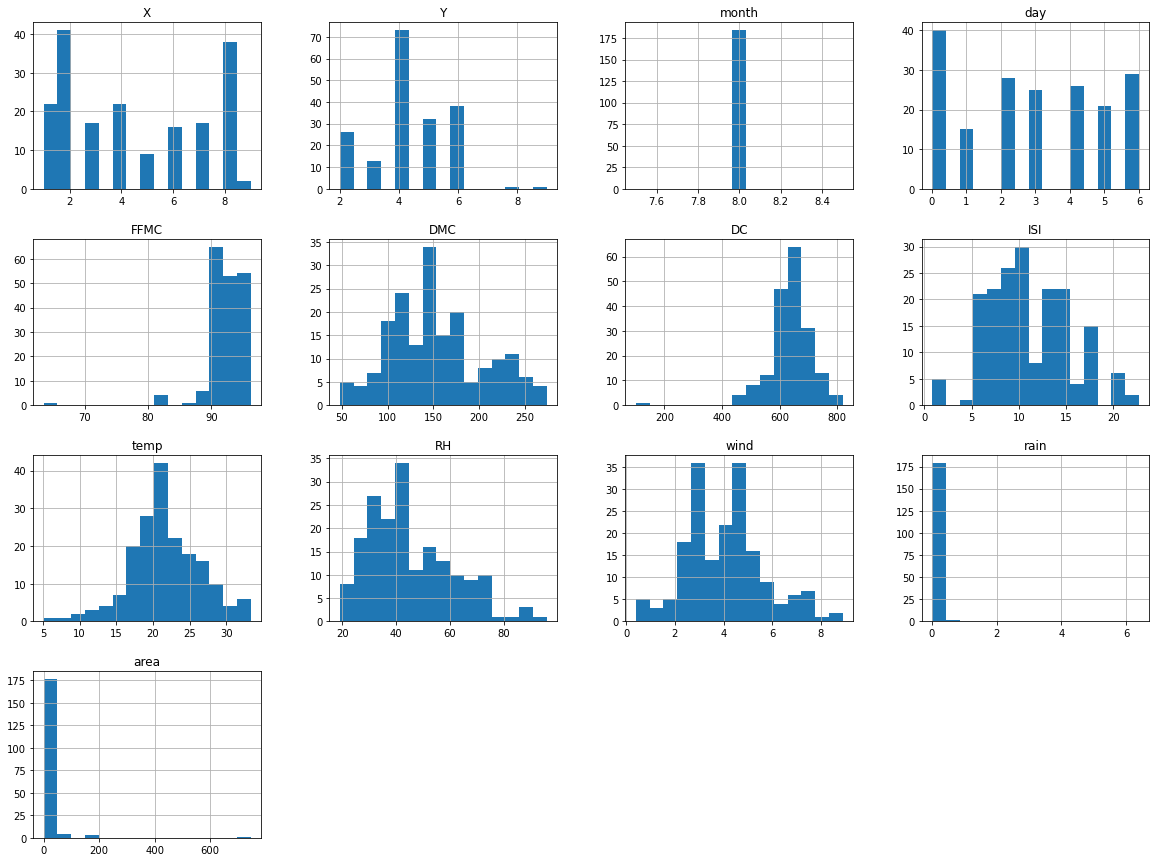

In [10]:
aug_fires.hist(bins=15, figsize=(20,15))

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

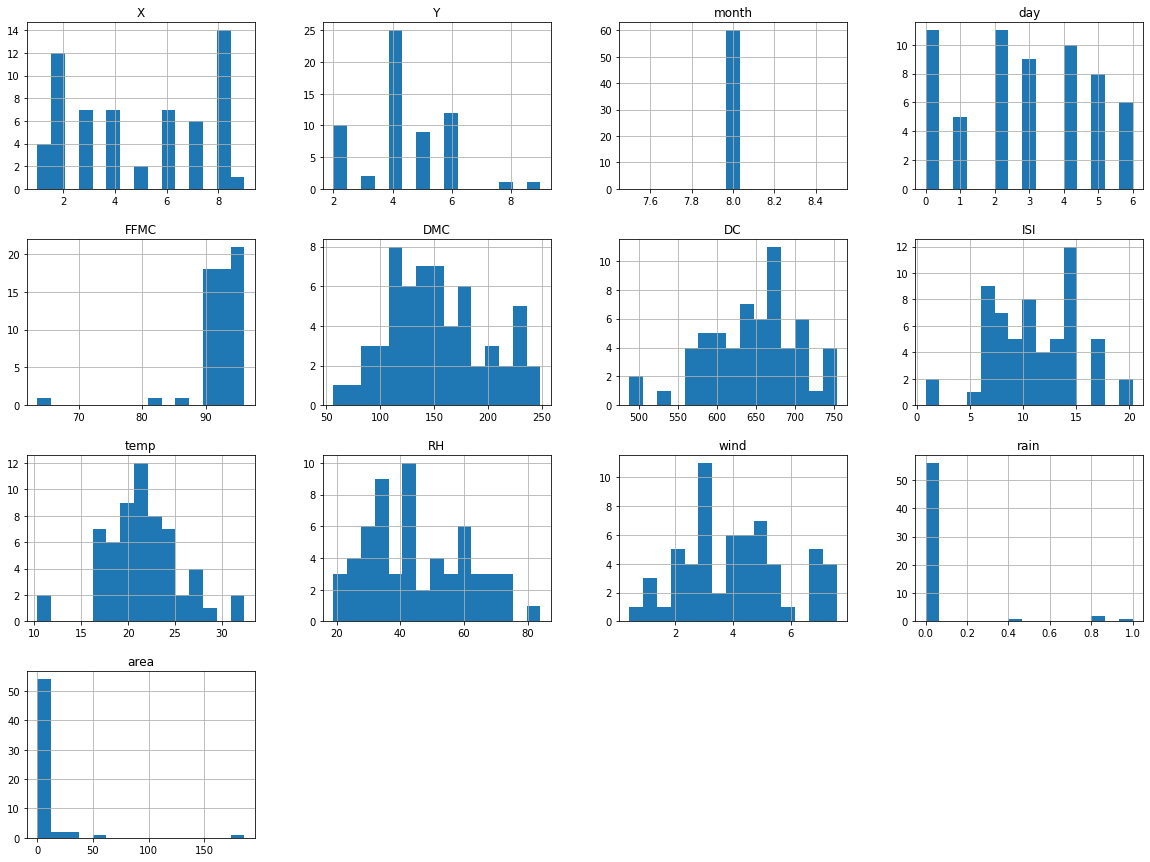

In [11]:
samp.hist(bins=15, figsize=(20,15))

In [13]:
mon_index =[8, 9, 3, 7, 2, 6, 10, 12, 4]

sample_list = [61, 57, 18, 11, 7, 6, 5, 3, 3]

In [14]:
def generate_month_sample(df, month, num_samples):
    
    month_df = df[df['month'] == month]
    
    return month_df.sample(n=num_samples)


In [21]:
def generate_year_sample(df, num_sample_list, index_list):
    
    final_df = pd.DataFrame()
    
    dex = range(len(index_list))
    
    
    
    for i in dex:
        
        if i == 0:
            
            final_df = generate_month_sample(df, index_list[i], num_sample_list[i])
        else:
            
            final_df = pd.concat([final_df, generate_month_sample(df, index_list[i], num_sample_list[i])])
    
    return final_df
        
        

In [22]:
one_yr = generate_year_sample(fire_df, sample_list, mon_index)

one_yr.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
481,2,4,8,1,95.0,135.5,596.3,21.3,30.6,28,3.6,0.0,2.07
431,1,4,8,5,90.6,269.8,811.2,5.5,22.2,45,3.6,0.0,0.00
262,6,3,8,5,91.1,141.1,629.1,7.1,19.3,39,3.6,0.0,1.56
497,7,5,8,2,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
251,6,5,8,3,93.1,157.3,666.7,13.5,22.1,37,3.6,0.0,0.21


In [23]:
len(one_yr)

171